<a href="https://colab.research.google.com/github/fernandodeeke/python/blob/master/regressao_16_05_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1></h1></center>
<center><h1>Matemática com Python</h1></center>
<center><h2>2025/1</h2></center>
<center><h3>Técnicas de Regressão</h3></center>
<center><h4>Prof. Fernando Deeke Sasse - CCT UDESC</h4></center>


## 1. Introdução

Dados podem fornecer uma  informação razoável de que a função $x(t)$ é linear e que o fato dos pontos não estarem exatamente sobre uma linha reta é devido a erros experimentais. Um vez feita tal suposição podemos nos perguntar como podemos determinar os coeficientes $a$ e $b$ reta
$$
                           x = at + b
$$  
que melhor se ajusta a esses dados. Vejamos um exemplo:

In [2]:
# Exemplo
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# x = x(t)
T=np.array([1,2,3,4,5,6,7,8,9,10])
X=np.array([2.5, 3.8, 4.2, 5.9, 6.3, 7.5, 8.1, 9.9, 10.2, 11.5])

Text(0, 0.5, 'x')

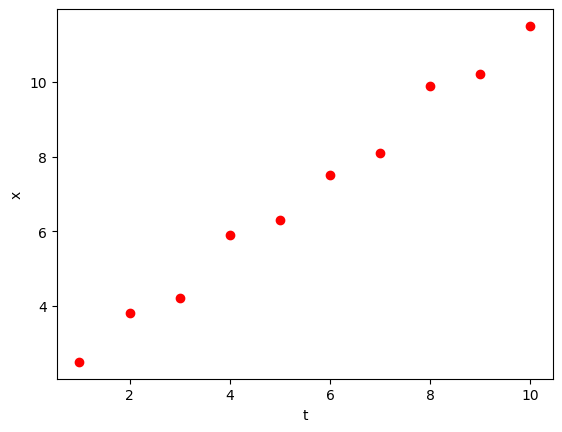

In [6]:
plt.plot(T,X,'ro')
plt.xlabel('t')
plt.ylabel('x')

De acordo com o gráfico acima é razoável supor que é possível ajustar uma reta a esses pontos. Na prática tal hipótese pode se originar na teoria sobre a qual as medidas são realizadas.
Veremos como resolver este problema usando dois métodos:

(i) Método dos mínimos quadrados: quando o número de dados não é excessivamente grande.

(ii) Método dos gradientes descendentes: apropriado em qualquer caso, especialmente se o números de dados for muito grande.

Para um estudo completo sugerimos as referências [1] e [2].

## 2. Método dos Mínimos Quadrados
Suponhamos que uma suposição é feita sobre os valores de $a$ e $b$. Em geral,um ponto $(T_k,X_k)$ não estará exatamente sobre a reta, ou seja,

$$
aT_k+b-X_k \neq 0
$$

Podemos definir um erro absoluto associado a este ponto, que depende de $a$ e $b$, dado por

$$
                 E_k(a,b)=|aT_k+b-X_k|
$$
Definimos um erro total da seguinte forma:

$$
\phi = E(a,b)=\sum_{i=1}^{n} (aT_k+b-X_k)^2
$$


A próxima tarefa consiste em encontrar o ponto $(a,b)$ que minimiza esta função.

Este problema é um exemplo de uma  aproximação $L_1$ e que pode ser resolvido por meio de técnicas de programação linear. Dependendo do número de pontos a complexidade deste problema em termos de número de operações pode ser muito custosa. O métodos do cálculo diferencial não podem ser aplicados, pois esta função não é diferenciável.

Em particular,

$$
\frac{\partial \phi}{\partial a}=\sum_{i=1}^{n} 2T_k(aT_k+b-X_k)=0
$$

e

$$
\frac{\partial \phi}{\partial b}=\sum_{i=1}^{n} 2(aT_k+b-X_k)=0\,.
$$

Estas equações, chamadas *normais* podem ser também escritas como

$$
\left(\sum_{k=1}^n T_k^2\right)a+\left(\sum_{k=1}^n T_k\right)b= \sum_{k=1}^n T_k X_k,
$$


$$
\left(\sum_{k=1}^n T_k\right)a+nb= \left(\sum_{k=1}^n X_k\right)
$$

Definindo

$$
p = \sum_{k=1}^n T_k\,,\quad q=\sum_{k=1}^n X_k\,,\quad
r=\sum_{k=1}^n T_k X_k\,,\quad s=\sum_{k=1}^n T_k^2\,,
$$

temos, de forma matricial,

$$
\begin{bmatrix}
s&p\\p&n
\end{bmatrix}=
\begin{bmatrix}
a\\b
\end{bmatrix}=\begin{bmatrix}
r\\q
\end{bmatrix}\,.
$$

Definindo

$$
\Delta = det \begin{bmatrix}
s&p\\p&n
\end{bmatrix} = ns-p^2\,,
$$

temos, usando a regra de Cramer,

$$
a = \frac{1}{\Delta}det\begin{bmatrix}
r&p\\q&n
\end{bmatrix}=\frac{1}{d}(rn-pq)\,,
$$

$$
b = \frac{1}{\Delta}det\begin{bmatrix}
s&r\\p&q
\end{bmatrix}=\frac{1}{d}(sq-pr)\,.
$$

Voltemos ao nosso problema e implementemos as fórmulas acima:

In [7]:
p = np.sum(T)
q = np.sum(X)
r = np.sum(T*X)
s = np.sum(T**2)

In [11]:
d = s*n - p**2

In [12]:
#Coeficiente angular
a = (r*n - p*q)/d
a

np.float64(0.9824242424242419)

In [14]:
#Coeficiente linear
b = (q*s - p*r)/d
b

np.float64(1.586666666666671)

Text(0, 0.5, 'x')

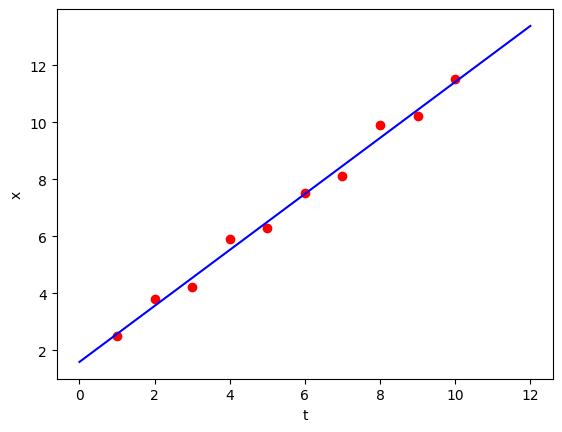

In [15]:
# Gráfico da reta ajustada e os pontos dados
t = np.linspace(0,12,100)
plt.plot(T,X,'ro')
plt.plot(t,a*t+b,'b')
plt.xlabel('t')
plt.ylabel('x')

In [16]:
# Usando os comandos do sistema
from scipy.optimize import curve_fit

In [17]:
def g(t,a,b):
    return a*t+b

In [18]:
param, pcov = curve_fit(g,T,X)

In [19]:
param

array([0.98242424, 1.58666668])

Text(0, 0.5, 'x')

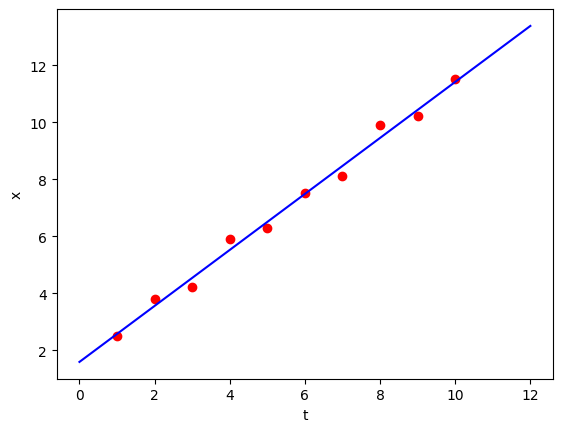

In [20]:
# Gráfico
t = np.linspace(0,12,100)
plt.plot(T,X,'ro')
plt.plot(t,param[0]*t+param[1],'b')
plt.xlabel('t')
plt.ylabel('x')

Text(0, 0.5, 'x')

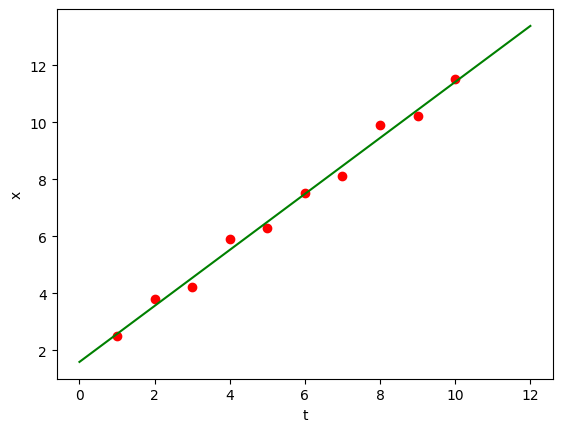

In [22]:
# Outro modo
plt.plot(T,X,'ro', t, g(t, *param),'g-')
plt.xlabel('t')
plt.ylabel('x')

In [23]:
# Erro quadrático médio
F = g(T,*param)
F

array([ 2.56909092,  3.55151516,  4.5339394 ,  5.51636364,  6.49878788,
        7.48121213,  8.46363637,  9.44606061, 10.42848485, 11.41090909])

In [24]:
np.sum((F-X)**2)/len(T)

np.float64(0.07635151515151531)

### Ajuste de uma função qualquer

In [32]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([1,2.1,3.1,5.4,4.1,2.9,2.1,1.8,1.1,0.3])

In [33]:
n = len(y)

Text(0, 0.5, 'y')

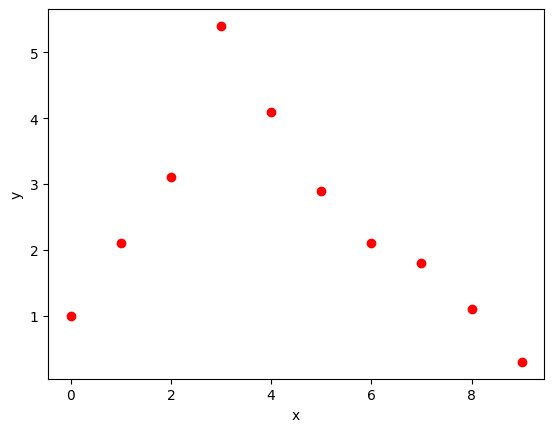

In [34]:
plt.plot(x,y,'ro')
plt.xlabel('x')
plt.ylabel('y')

Ajustemos uma curva aos dados da forma

$$
f(x) = a +bx+cx^2 +dx^3+k \cos(\omega x)
$$

Note que nas equações acima os parâmetros $k$ e $\omega$ aparecem de forma não linear, de modo que se fossemos usar o método dos mínimos quadrados, o sistema de equações resultante seria não linear.

In [53]:
def f(x,a,b,c,d,k,w):
    return a + b*x + c*x**2 + d*x**3  +k*np.cos(w*x)

In [54]:
param, pcov = curve_fit(f,x,y)

In [55]:
param

array([ 2.27921332,  0.29061349,  0.08083678, -0.01716657, -1.28731212,
        1.02447045])

Text(0, 0.5, 'y')

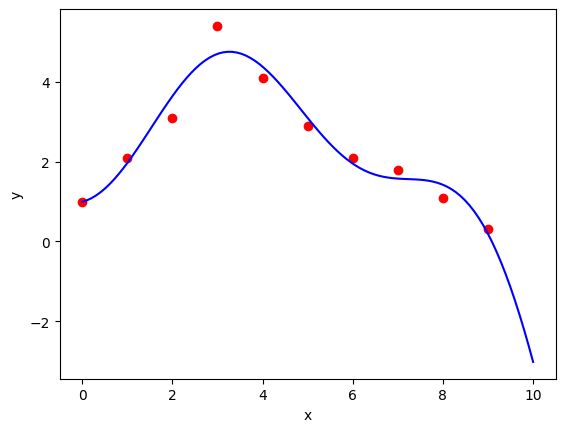

In [56]:
t = np.linspace(0,10,100)
plt.plot(x,y,'ro')
plt.plot(t,f(t,*param),'b')
plt.xlabel('x')
plt.ylabel('y')

### Coeficiente de determinação e coeficiente de correlação

Na regressão linear, o objetivo é encontrar um modelo que explique a relação entre uma variável dependente $y$ e uma ou mais variáveis ​​independentes $x$. O **método dos mínimos quadrados** é uma abordagem padrão que minimiza a soma dos quadrados dos resíduos:

$$
\text{SSE} = \sum_{i=1}^n(\hat{y}_i-y_i)^2
$$

sendo $\hat{y}_i$ são os valores previstos pelo modelo de regressão e $y_i$ são os valores observados (tabelados).

O **coeficiente de determinação**, denotado por $r^2$, é uma medida de quão bem o modelo de regressão explica a variabilidade dos dados de resposta em torno de sua média. É definido como:

$$
r^2 = 1 - \frac{\text{SSE}}{\text{SST}}
$$

Significado das siglas:

- $\text{SSE}$ (*sum of squared estimate of errors*)  é a **soma dos erros quadrados** $\sum (y_i - \hat{y}_i)^2$
- $\text{SST}$ (*sum of squares total*) é a **soma total dos quadrados**: $\sum (\hat{y}_i - \bar{y})^2$


Alternativamente, $r^2$ pode ser expresso como:

$$
r^2 = \frac{\text{SSR}}{\text{SST}}
$$

onde $\text{SSR}$ é a **soma dos quadrados da regressão**, medindo a variância explicada pelo modelo:

$$
\text{SSR} = \sum (\hat{y}_i - \bar{y})^2
$$

Notemos que:

- $r^2 = 1$: o modelo explica toda a variabilidade nos dados de resposta.
- $r^2 = 0$: o modelo não explica nenhuma variabilidade; não é melhor do que prever a média.
- $0 < r^2 < 1$: a proporção da variabilidade explicada pelo modelo.


Na regressão linear simples (um preditor), $r^2$ também é o quadrado do coeficiente de correlação de Pearson entre $x$ e $y$. A quantidade $r$ é denominada *coefficiente de correlação*.

In [57]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [58]:
y

array([1. , 2.1, 3.1, 5.4, 4.1, 2.9, 2.1, 1.8, 1.1, 0.3])

In [59]:
param

array([ 2.27921332,  0.29061349,  0.08083678, -0.01716657, -1.28731212,
        1.02447045])

In [60]:
# Coeficiente de deteminação
y_pred = f(x,*param)
y_mean = np.mean(y)
SSE = np.sum((y_pred - y)**2)
SST = np.sum((y - y_mean)**2)
r2 =  1 - SSE/SST
r2


np.float64(0.9480351760817698)

Isso significa que aproximadamente 94,8% da incerteza original foi explicada pelo modelo.


In [62]:
 # Predição para x = 4.5
print(round(f(4.5,*param),2))

np.float64(3.79)

## 2. Método dos gradientes descendentes

O método descrito anteriormente funciona bem para funções de uma variável e quando o número de pontos não é muito grande. Descreveremos agora um método mais apropriado para lidar com ajuste de funções de uma ou mais variável, que funciona bem com um número muito grande de pontos. Nosso objetivo é modelar a relação entre uma variável dependente escalar $y$ e uma variável independente $x$ como:

$$
y \approx \hat{y} = \theta_0 + \theta_1 x\,.
$$

Devemos encontrar os parâmetros $\theta_0$ e $\theta_1$ que minimizem a discrepância entre os valores previstos $\hat{y}$ e os valores observados $y$. Essa discrepância é quantificada pela função de custo (Erro Quadrático Médio):

$$
J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2 = \frac{1}{2m} \sum_{i=1}^{m} \left( \theta_0 + \theta_1 x^{(i)} - y^{(i)} \right)^2
$$

O método dos gradientes descendentes é um algoritmo de otimização iterativa para minimizar a função de custo $J(\theta_0, \theta_1)$. Os parâmetros são atualizados da seguinte forma:

$$
\theta_j := \theta_j - \alpha \frac{\partial J}{\partial \theta_j}
$$

para $j = 0, 1$, onde $\alpha$ é a taxa de aprendizado (tomando como positivo, pois buscamos um mínimo).

As derivadas parciais são:

$$
\frac{\partial J}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)
$$

$$
\frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)x^{(i)}
$$

De modo mais compacto, para fins computacionais,  podemos reescrever:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

onde $y^{(i)}$ são os valores observados e $h_{\theta}(x)$ é a hipótese, dada pelo modelo linear.

$$h_{\theta}(x) = \theta^T\mathbf{x} = \theta_0 + \theta_1x_1$$

sendo

$$
\theta^T = [\theta_0 \,\,\theta_1]\,,\qquad \mathbf{x}^T = [ 1,x_1]\,.
$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Gera dados sintéticos
np.random.seed(0)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

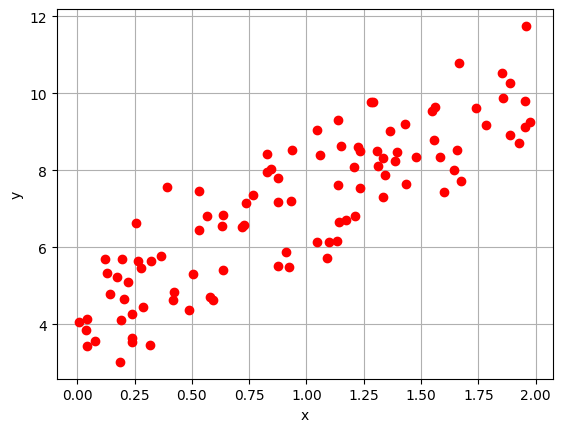

In [7]:
# Gráfico
plt.plot(x,y,'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

In [8]:
# Vetor de dados:
X = np.c_[np.ones((100, 1)), x]

In [9]:
np.shape(X)

(100, 2)

In [10]:
# Parâmetros
alpha =0.1
n_it=1000
m = len(x)
theta = np.zeros((2,1))

In [11]:
for _ in range(n_it):
  gradJ = 1/m*X.T@(X@theta -y)
  theta = theta -alpha*gradJ
theta

array([[4.222151  ],
       [2.96846758]])

Text(0, 0.5, 'y')

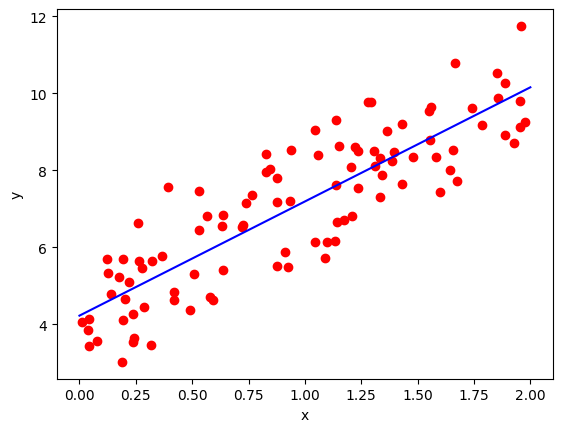

In [12]:
# Gráficos
t = np.linspace(0,2,100)
plt.plot(x,y,'ro')
plt.plot(t,theta[0]+theta[1]*t,'b')
plt.xlabel('x')
plt.ylabel('y')

Podemos prever valore de $y$ a partir do modelo. Por exemplo, determinemos $y(2.5)$:

In [21]:
x1 = np.array([1,1.5])
x1@theta

array([8.67485237])

ou

In [24]:
print(round((x1@theta)[0],4))

8.6749


Determinemos o coeficiente de determinação do ajuste:

In [26]:
from sklearn.metrics import r2_score

In [28]:
# Valores de y previstos pelo modelo
y_pred = X @ theta
# Coeficiente de determinação
r2 = r2_score(y, y_pred)
print(f"Coeficiente de Determinação (r²): {r2:.4f}")

Coeficiente de Determinação (r²): 0.7470


Isso significa que aproximadamente 74,7% da incerteza original foi explicada pelo modelo.

## Bibliografia

**1.** Snehan Kekre, Linear Regression with NumPy and Python, Coursera Project Network, https://www.coursera.org/projects/linear-regression-numpy-python

**2.** Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani. An Introduction to Statistical Learning, 2nd ed., Springer, 2021.  https://www.statlearning.com/resources-second-edition